<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [8]:
# your code here
#Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):
from sympy import symbols, diff, solve
x = symbols('x')
def find_extr_min_max(f_x):
    first_diff = diff(f_x)
    extr_first_diff = solve(first_diff, x)
    second_diff = diff(first_diff, x)
    for x_extr in extr_first_diff:

        if x_extr.is_real:   #исключаем комплекнсые корни, функция работает только для дейсвтительных чисел.
            try:
                f_first_diff_extr = f_x.subs(x, x_extr).evalf()
                f_second_diff_extr = second_diff.subs(x, x_extr).evalf()
                if f_second_diff_extr > 0:
                    print(f"({x_extr:.2f}, {f_first_diff_extr:.2f}) - точка минимума")
                elif f_second_diff_extr < 0:
                    print(f"({x_extr:.2f}, {f_first_diff_extr:.2f}) - точка максимума")
                else:
                    print(f"({x_extr:.2f}, {f_first_diff_extr:.2f}) - не определено")
            except Exception as e:
                print(f'Error: {e}')

In [9]:
# Задача 1 а)
afx = x ** 2 - 30 * x + 1
find_extr_min_max(afx)

(15.00, -224.00) - точка минимума


In [10]:
# Задача 1 b)
bgx = -x**3 + 5*x - 7*(x**2) + 17
find_extr_min_max(bgx)

(-5.00, -58.00) - точка минимума
(0.33, 17.85) - точка максимума


In [11]:
# Задача 1 c)
chx = x**2 - 1/x
find_extr_min_max(chx)

(-0.79, 1.89) - точка минимума


In [12]:
# Задача 1 d)

djx = 1/(x**5) + (x**17) + 8
find_extr_min_max(djx)

(-0.95, 6.29) - точка максимума
(0.95, 9.71) - точка минимума


## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

**В репозиторий и Anytask приложен пдф файл с решением**

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [19]:
# your code here
def find_inflection_points(f_x):
    first_diff = diff(f_x)
    second_diff = diff(first_diff, x)
    third_diff = diff(second_diff, x)
    inflection = solve(second_diff, x)

    if not inflection:
        print("Точки перегиба отсутствуют")
        return

    real_inflection = False

    for point_f in inflection:
        if point_f.is_real:
            real_inflection = True
            try:
                f_inflection = f_x.subs(x, point_f).evalf()
                third_inflection = third_diff.subs(x, point_f).evalf()

                if third_inflection != 0:
                    print(f"({point_f:.2f}, {f_inflection:.2f}) - Точка перегиба")
                else:
                    print(f"({point_f:.2f}, {f_inflection:.2f}) - Точки перегиба нет")
            except Exception as e:
                print(f'ERORR diff: {e}')

    if not real_inflection:
        print("Нет точек перегиба (действительных).")

In [14]:
# Задача 1 а)
find_inflection_points(afx)

Точки перегиба отсутствуют


In [16]:
# Задача b)
find_inflection_points(bgx)

(-2.33, -20.07) - Точка перегиба


In [21]:

# Задача c)
find_inflection_points(chx)

(1.00, 0.00) - Точка перегиба


In [20]:
# Задача d)
find_inflection_points(djx)

Нет точек перегиба (действительных).


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

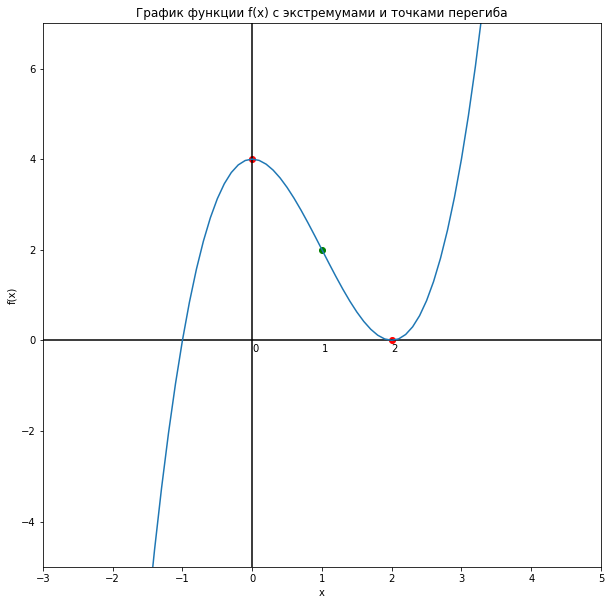

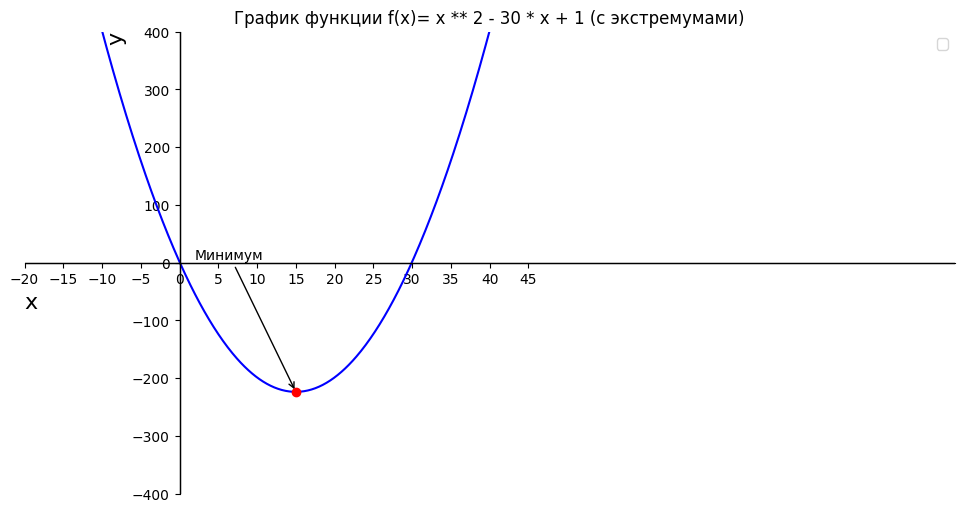

In [30]:
# your code here
import numpy as np
import matplotlib.pyplot as plt

def afx(x):
    return x**2 - 30*x + 1

x_gen = np.linspace(-20, 40, 500)
y_gen = afx(x_gen)

plt.figure(figsize=(12, 6))
plt.plot(x_gen, y_gen, color='blue')
plt.annotate('Минимум',
             xy=(15, -224),
             xytext=(2, 6),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')



#ax.spines['top'].set_visible(True)    # Включить верхнюю рамку
#ax.spines['right'].set_visible(True)   # Включить правую рамку
#ax.spines['left'].set_visible(True)    # Включить левую рамку
#ax.spines['bottom'].set_visible(True)

plt.axhline(0, lw=1, ls='-', color='black')
plt.axvline(0, lw=1, ls='-', color='black')
plt.xticks(np.arange(-20, 50, 5))
plt.yticks(np.arange(-500, 500, 100))
plt.scatter(15, -224, color='red', zorder=10)
plt.title('График функции f(x)= x ** 2 - 30 * x + 1 (с экстремумами)')
plt.xlabel('x', loc='left', fontsize='16')
plt.ylabel('y', loc='top', fontsize='16')
plt.legend()
plt.xlim(-20, 100)
plt.ylim(-400, 400)
plt.show()

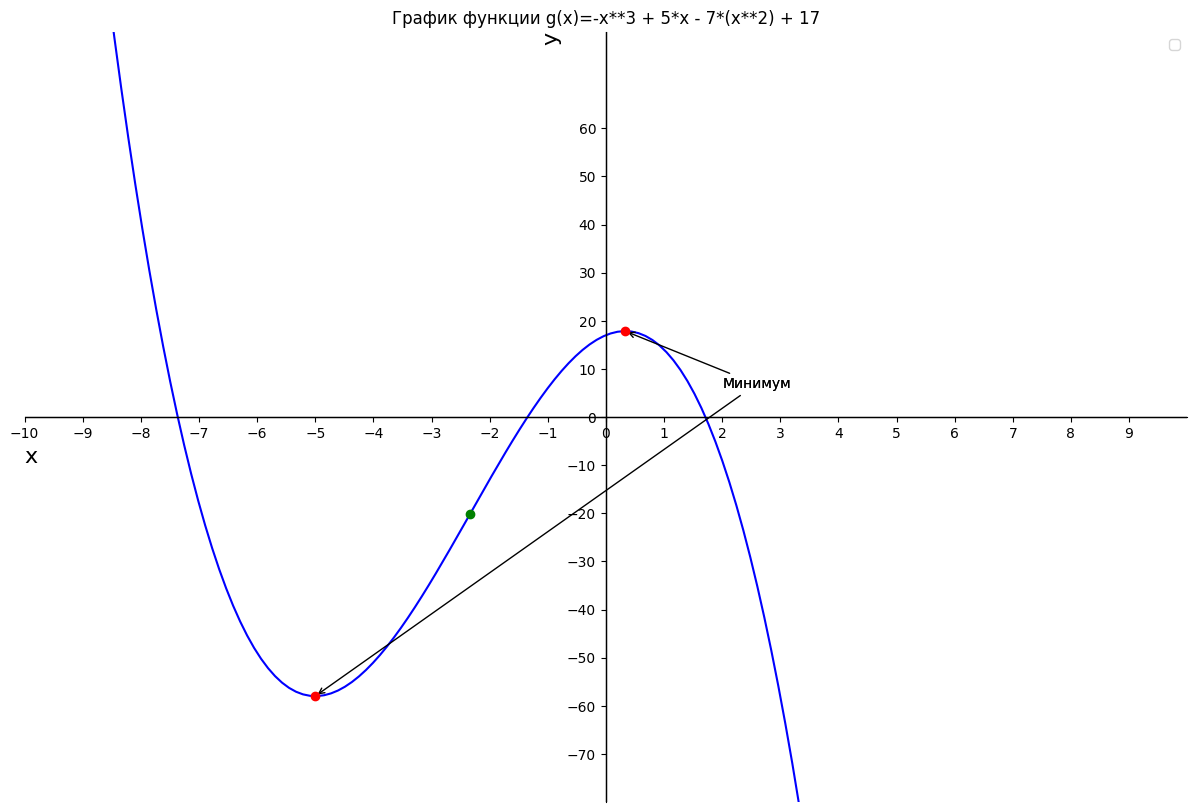

In [32]:
def bgx(x):
    return -x**3 + 5*x - 7*(x**2) + 17

x_gen = np.linspace(-20, 40, 500)
y_gen = bgx(x_gen)

plt.figure(figsize=(15, 10))
plt.plot(x_gen, y_gen, color='blue')

plt.annotate('Минимум',
             xy=(-5, -58),
             xytext=(2, 6),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
plt.annotate('Минимум',
             xy=(0.33, 17.85),
             xytext=(2, 6),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.spines['top'].set_visible(True)    # Включить верхнюю рамку
#ax.spines['right'].set_visible(True)   # Включить правую рамку
#ax.spines['left'].set_visible(True)    # Включить левую рамку
#ax.spines['bottom'].set_visible(True)
plt.axhline(0, lw=1, ls='-', color='black')
plt.axvline(0, lw=1, ls='-', color='black')
plt.xticks(np.arange(-10, 10, 1))
plt.yticks(np.arange(-70, 70, 10))
plt.scatter(-5, -58, color='red', zorder=10)
plt.scatter(0.33, 17.85, color='red', zorder=10)
plt.scatter(-7/3, -20.07, color='green', zorder=10)
plt.xlabel('x', loc='left', fontsize='16')
plt.ylabel('y', loc='top', fontsize='16')
plt.title('График функции g(x)=-x**3 + 5*x - 7*(x**2) + 17')
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-80, 80)
plt.show()

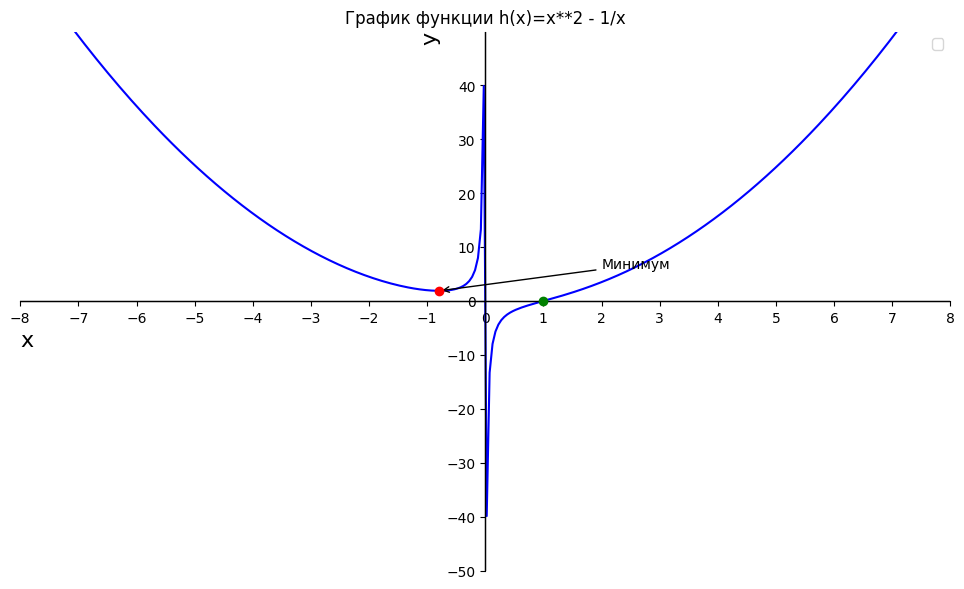

In [33]:
def chx(x):
    return x**2 - 1/x

x_gen = np.linspace(-10, 10, 400)
x_gen = x_gen[x_gen != 0]
y_gen = chx(x_gen)

plt.figure(figsize=(12, 7))
plt.plot(x_gen, y_gen, color='blue')
plt.annotate('Минимум',
             xy=(-0.79, 1.89),
             xytext=(2, 6),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.spines['top'].set_visible(True)    # Включить верхнюю рамку
#ax.spines['right'].set_visible(True)   # Включить правую рамку
#ax.spines['left'].set_visible(True)    # Включить левую рамку
#ax.spines['bottom'].set_visible(True)
plt.axhline(0, lw=1, ls='-', color='black')
plt.axvline(0, lw=1, ls='-', color='black')
plt.xticks(np.arange(-10, 10, 1))
plt.yticks(np.arange(-50, 50, 10))
plt.scatter(1, 0, color='g', zorder=10)
plt.scatter(-0.79, 1.89, color='red', zorder=10)
plt.xlabel('x', loc='left', fontsize='16')
plt.ylabel('y', loc='top', fontsize='16')
plt.title('График функции h(x)=x**2 - 1/x')
plt.legend()
plt.xlim(-8, 8)
plt.ylim(-50, 50)

plt.show()

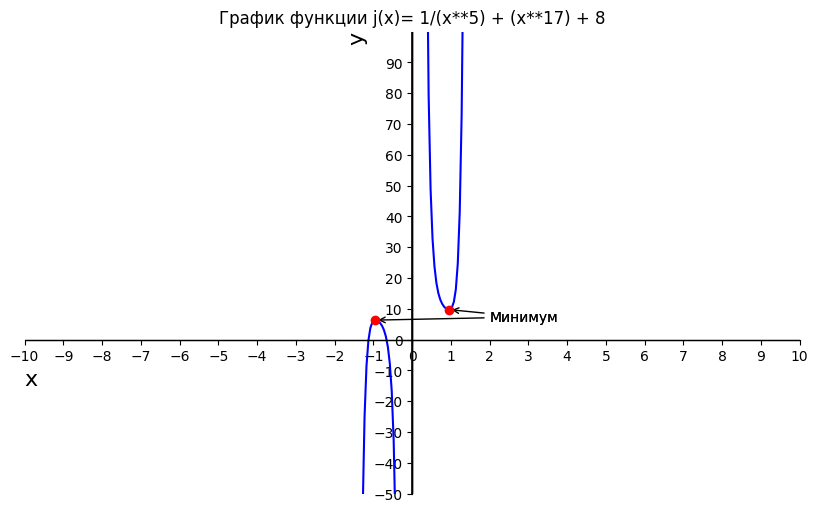

In [34]:
def djx(x):
    return 1/(x**5) + (x**17) + 8

x_gen = np.linspace(-10, 10, 400)
x_gen = x_gen[x_gen != 0]

y_gen = djx(x_gen)

plt.figure(figsize=(10, 6))
plt.plot(x_gen, y_gen, color='blue')
plt.annotate('Минимум',
             xy=(-0.95, 6.29),
             xytext=(2, 6),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
plt.annotate('Минимум',
             xy=(0.95, 9.71),
             xytext=(2, 6),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.spines['top'].set_visible(True)    # Включить верхнюю рамку
#ax.spines['right'].set_visible(True)   # Включить правую рамку
#ax.spines['left'].set_visible(True)    # Включить левую рамку
#ax.spines['bottom'].set_visible(True)
plt.axhline(0, lw=1, ls='-', color='black')
plt.axvline(0, lw=1, ls='-', color='black')
plt.xticks(np.arange(-10, 11, 1))
plt.yticks(np.arange(-50, 100, 10))
plt.scatter(-0.95, 6.29, color='red', zorder=10)
plt.scatter(0.95, 9.71, color='red', zorder=10)
plt.xlabel('x', loc='left', fontsize='16')
plt.ylabel('y', loc='top', fontsize='16')
plt.title('График функции j(x)= 1/(x**5) + (x**17) + 8')
plt.xlim(-10, 10)
plt.ylim(-50, 100)

plt.show()

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [37]:
# your code here
import sympy as sp

afx = x ** 2 - 30 * x + 1

def gradient_descent_method(func, x_start, learning_rate, num_iterations, delta):
    start_point_iterations = x_start
    first_diff_f_x = sp.diff(func)

    list_values = []
    list_values.append(start_point_iterations)

    for i in range(num_iterations):
      gradient = first_diff_f_x.subs(x, start_point_iterations)
      if abs(gradient) < delta:
         return start_point_iterations.evalf(), list_values
      new_start_point_iter = start_point_iterations - learning_rate * gradient
      list_values.append(new_start_point_iter)

      start_point_iterations = new_start_point_iter
    return start_point_iterations.evalf(), list_values
gradient_descent_method(afx, -100,0.01,10000, 1) # delta = 1

(14.5082568970670,
 [-100,
  -97.7000000000000,
  -95.4460000000000,
  -93.2370800000000,
  -91.0723384000000,
  -88.9508916320000,
  -86.8718737993600,
  -84.8344363233728,
  -82.8377475969053,
  -80.8809926449672,
  -78.9633727920679,
  -77.0841053362265,
  -75.2424232295020,
  -73.4375747649119,
  -71.6688232696137,
  -69.9354468042214,
  -68.2367378681370,
  -66.5720031107743,
  -64.9405630485588,
  -63.3417517875876,
  -61.7749167518359,
  -60.2394184167991,
  -58.7346300484632,
  -57.2599374474939,
  -55.8147386985440,
  -54.3984439245731,
  -53.0104750460817,
  -51.6502655451600,
  -50.3172602342568,
  -49.0109150295717,
  -47.7306967289803,
  -46.4760827944007,
  -45.2465611385126,
  -44.0416299157424,
  -42.8607973174275,
  -41.7035813710790,
  -40.5695097436574,
  -39.4581195487843,
  -38.3689571578086,
  -37.3015780146524,
  -36.2555464543594,
  -35.2304355252722,
  -34.2258268147667,
  -33.2413102784714,
  -32.2764840729020,
  -31.3309543914439,
  -30.4043353036150,
  -29.4

In [39]:

gradient_descent_method(afx, -100,0.01,10000, 0.01) # минимум был 15. Полученное значение было близко. Уменьшим delta = 0.01

(14.9950877152314,
 [-100,
  -97.7000000000000,
  -95.4460000000000,
  -93.2370800000000,
  -91.0723384000000,
  -88.9508916320000,
  -86.8718737993600,
  -84.8344363233728,
  -82.8377475969053,
  -80.8809926449672,
  -78.9633727920679,
  -77.0841053362265,
  -75.2424232295020,
  -73.4375747649119,
  -71.6688232696137,
  -69.9354468042214,
  -68.2367378681370,
  -66.5720031107743,
  -64.9405630485588,
  -63.3417517875876,
  -61.7749167518359,
  -60.2394184167991,
  -58.7346300484632,
  -57.2599374474939,
  -55.8147386985440,
  -54.3984439245731,
  -53.0104750460817,
  -51.6502655451600,
  -50.3172602342568,
  -49.0109150295717,
  -47.7306967289803,
  -46.4760827944007,
  -45.2465611385126,
  -44.0416299157424,
  -42.8607973174275,
  -41.7035813710790,
  -40.5695097436574,
  -39.4581195487843,
  -38.3689571578086,
  -37.3015780146524,
  -36.2555464543594,
  -35.2304355252722,
  -34.2258268147667,
  -33.2413102784714,
  -32.2764840729020,
  -31.3309543914439,
  -30.4043353036150,
  -29.4

In [40]:
import sympy as sp

bgx = -x**3 + 5*x - 7*(x**2) + 17

def gradient_descent_method(func, x_start, learning_rate, num_iterations, delta):
    start_point_iterations = x_start
    first_diff_f_x = sp.diff(func)

    list_values = []
    list_values.append(start_point_iterations)

    for i in range(num_iterations):
      gradient = first_diff_f_x.subs(x, start_point_iterations)
      if abs(gradient) < delta:
         return start_point_iterations.evalf(), list_values
      new_start_point_iter = start_point_iterations - learning_rate * gradient
      list_values.append(new_start_point_iter)

      start_point_iterations = new_start_point_iter
    return start_point_iterations.evalf(), list_values
gradient_descent_method(bgx, 0.1,0.01,10000, 0.01) #применим delta = 0.01  на все функции

(-4.99939429739673,
 [0.1,
  0.0643000000000000,
  0.0234260347000000,
  -0.0232778570689470,
  -0.0765205012997080,
  -0.137057709868092,
  -0.205682244774597,
  -0.283208603468575,
  -0.370451594561817,
  -0.468197786283069,
  -0.577169201350288,
  -0.697979160929708,
  -0.831080996187103,
  -0.976711466986597,
  -1.13483211367243,
  -1.30507329179990,
  -1.48668706374280,
  -1.67851609990179,
  -1.87898586495916,
  -2.08612624963195,
  -2.29762624269832,
  -2.51092132614200,
  -2.72330853461964,
  -2.93207944822443,
  -3.13465787425484,
  -3.32872757699168,
  -3.51233661931577,
  -3.68396849019838,
  -3.84257536372292,
  -3.98757435186742,
  -4.11881228477873,
  -4.23650756553043,
  -4.34117873412079,
  -4.43356877285022,
  -4.51457243914148,
  -4.58517165137361,
  -4.64638171038911,
  -4.69920925988443,
  -4.74462152622274,
  -4.78352553708104,
  -4.81675561535519,
  -4.84506736176325,
  -4.86913646020940,
  -4.88956086859450,
  -4.90686522556701,
  -4.92150656689003,
  -4.93388067

In [41]:
# пришлось вставить весь код, потому что потсоянно колаб сбоит
import sympy as sp

chx = x**2 - 1/x

def gradient_descent_method(func, x_start, learning_rate, num_iterations, delta):
    start_point_iterations = x_start
    first_diff_f_x = sp.diff(func)

    list_values = []
    list_values.append(start_point_iterations)

    for i in range(num_iterations):
      gradient = first_diff_f_x.subs(x, start_point_iterations)
      if abs(gradient) < delta:
         return start_point_iterations.evalf(), list_values
      new_start_point_iter = start_point_iterations - learning_rate * gradient
      list_values.append(new_start_point_iter)

      start_point_iterations = new_start_point_iter
    return start_point_iterations.evalf(), list_values
gradient_descent_method(chx, 0.1,0.01,10000, 0.01)

(-0.795337620232137,
 [0.1,
  -0.902000000000000,
  -0.896250991686373,
  -0.890775150568835,
  -0.885562353802390,
  -0.880602619436358,
  -0.875886122521809,
  -0.871403210189867,
  -0.867144415597591,
  -0.863100470659616,
  -0.859262317505104,
  -0.855621118620157,
  -0.852168265655413,
  -0.848895386896732,
  -0.845794353413442,
  -0.842857283913396,
  -0.840076548346943,
  -0.837444770312849,
  -0.834954828328207,
  -0.832599856031447,
  -0.830373241392907,
  -0.828268625011051,
  -0.826279897574559,
  -0.824401196571262,
  -0.822626902324476,
  -0.820951633435801,
  -0.819370241711110,
  -0.817877806643434,
  -0.816469629522827,
  -0.815141227239251,
  -0.813888325840237,
  -0.812706853900521,
  -0.811592935756274,
  -0.810542884651915,
  -0.809553195842929,
  -0.808620539693693,
  -0.807741754805007,
  -0.806913841201940,
  -0.806133953608755,
  -0.805399394834036,
  -0.804707609285759,
  -0.804056176632954,
  -0.803442805627718,
  -0.802865328098733,
  -0.802321693125101,
  -0

In [42]:
# пришлось вставить весь код, потому что потсоянно колаб сбоит
import sympy as sp

djx = 1/(x**5) + (x**17) + 8

def gradient_descent_method(func, x_start, learning_rate, num_iterations, delta):
    start_point_iterations = x_start
    first_diff_f_x = sp.diff(func)

    list_values = []
    list_values.append(start_point_iterations)

    for i in range(num_iterations):
      gradient = first_diff_f_x.subs(x, start_point_iterations)
      if abs(gradient) < delta:
         return start_point_iterations.evalf(), list_values
      new_start_point_iter = start_point_iterations - learning_rate * gradient
      list_values.append(new_start_point_iter)

      start_point_iterations = new_start_point_iter
    return start_point_iterations.evalf(), list_values
gradient_descent_method(djx, 1,0.01,10000, 0.01)

(0.945845067925208,
 [1,
  0.880000000000000,
  0.965677569331180,
  0.930112121825998,
  0.954001984895949,
  0.940299384006888,
  0.949148187630069,
  0.943778668613260,
  0.947177105827685,
  0.945078771774553,
  0.946395215890669,
  0.945577312737549,
  0.946088610528509,
  0.945770195696027,
  0.945968964766741,
  0.945845067925208])

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

Приближения для f(x)): [ 9.44459954 -9.59280325  6.79732705 -7.33454526 -5.40977673 -0.10758529
 -6.6828375   1.30340749  9.14170772 -4.35853432]
Наименьший из найденных локальных минимумов для f(x): 14.99901


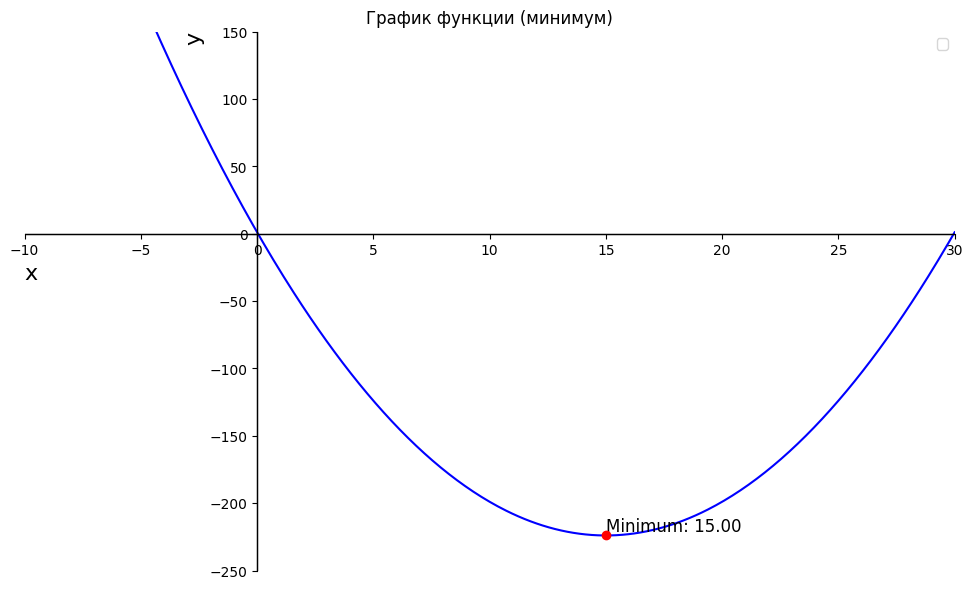

In [48]:
# your code here
def local_function_min(fx, minimum):
    x_gen = np.linspace(-5, 30, 400)
    y_gen = [fx.subs(x, val) for val in x_gen]

    plt.figure(figsize=(12, 7))
    plt.plot(x_gen, y_gen, color='blue')

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.axhline(0, lw=1, ls='-', color='black')
    plt.axvline(0, lw=1, ls='-', color='black')
    plt.scatter(minimum, fx.subs(x, minimum), color='red', zorder=10)
    plt.text(minimum, fx.subs(x, minimum), f'Minimum: {minimum:.2f}', fontsize=12, verticalalignment='bottom')

    plt.xlabel('x', loc='left', fontsize='16')
    plt.ylabel('y', loc='top', fontsize='16')
    plt.title('График функции (минимум)')
    plt.xlim(-10, 30)
    plt.ylim(-250, 150)
    plt.legend()
    plt.show()
#Параметры градиентного спуска
learn_rate_grad = 0.2
numder_iter = 1000
delta = 0.002

start_points = np.random.uniform(-10, 10, size=10)
results = []

for x_start in start_points:
    minimum, trace = gradient_descent_method(afx, x_start, learn_rate_grad, numder_iter, delta)
    results.append(minimum)

local_min = min(results)
print(f'Приближения для f(x)): {start_points}')
print(f'Наименьший из найденных локальных минимумов для f(x): {local_min:.5f}')
local_function_min(afx, local_min)

Приближения для f(x)): [-8.07353703  1.83411851 -7.36474485  5.03366098 -9.96499623]
Наименьший из найденных локальных минимумов для f(x): -5.0001


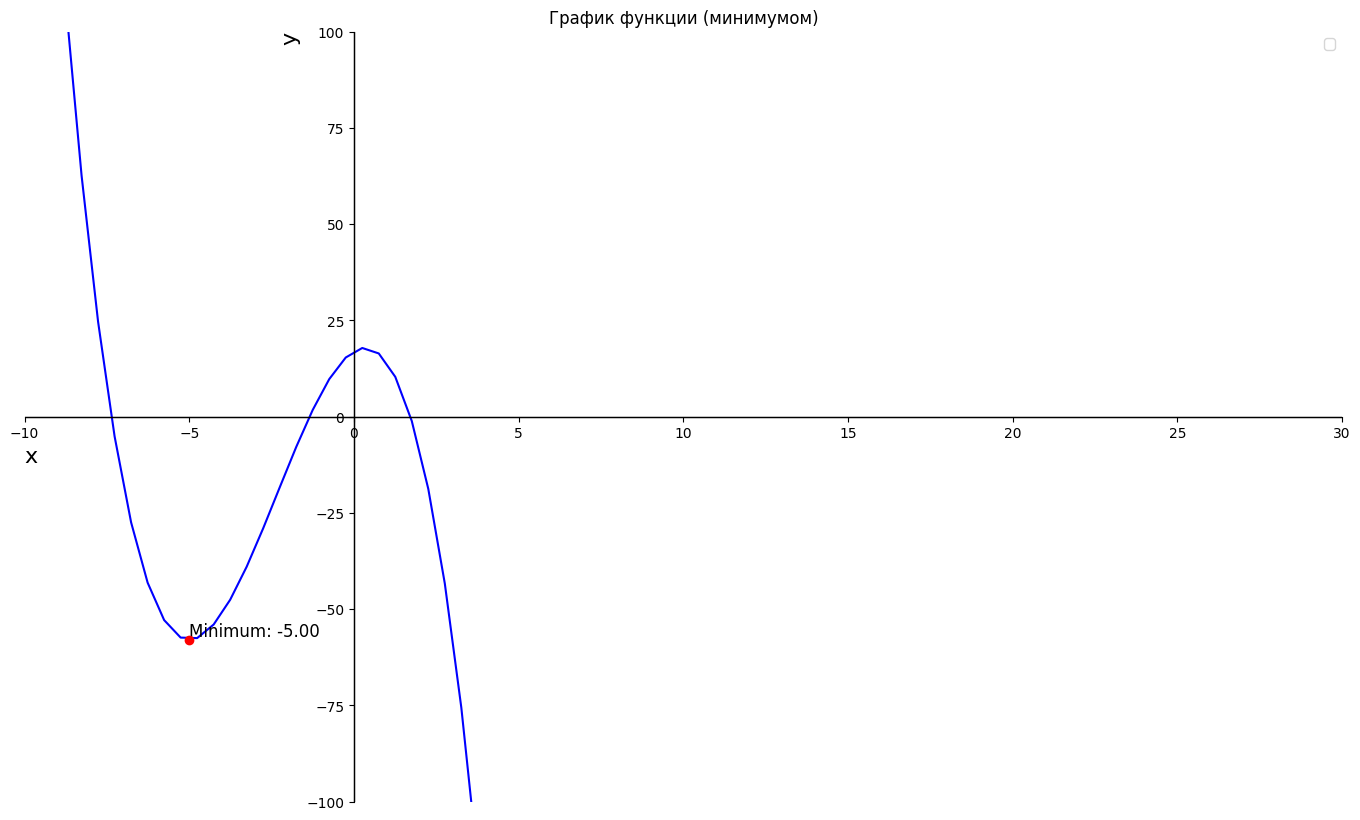

In [56]:
import sympy as sp
bgx = -x**3 + 5*x - 7*(x**2) + 17
def local_function_min(fx, minimum):
    x_gen = np.linspace(-100, 100, 400)
    y_gen = [fx.subs(x, val) for val in x_gen]

    plt.figure(figsize=(17, 10))
    plt.plot(x_gen, y_gen, color='blue')

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.axhline(0, lw=1, ls='-', color='black')
    plt.axvline(0, lw=1, ls='-', color='black')
    plt.scatter(minimum, fx.subs(x, minimum), color='red', zorder=10)
    plt.text(minimum, fx.subs(x, minimum), f'Minimum: {minimum:.2f}', fontsize=12, verticalalignment='bottom')
    plt.title('График функции (минимумом)')
    plt.xlabel('x', loc='left', fontsize='16')
    plt.ylabel('y', loc='top', fontsize='16')
    plt.xlim(-10, 30)
    plt.ylim(-100, 100)
    plt.legend()
    plt.show()
#Параметры градиентного спуска
learn_rate_grad = 0.1
numder_iter = 1000
delta = 0.001

start_points = np.random.uniform(-10, 10, size=5)
results = []

for x_start in start_points:
    minimum, trace = gradient_descent_method(bgx, x_start, learn_rate_grad, numder_iter, delta)
    results.append(minimum)

local_min = min(results)
print(f'Приближения для f(x)): {start_points}')
print(f'Наименьший из найденных локальных минимумов для f(x): {local_min:.4f}')
local_function_min(bgx, local_min)

Приближения для f(x)): [ 4.02304335  7.331406    6.05666511 -9.62861832 -7.35640586]
Наименьший из найденных локальных минимумов для f(x): -0.7938


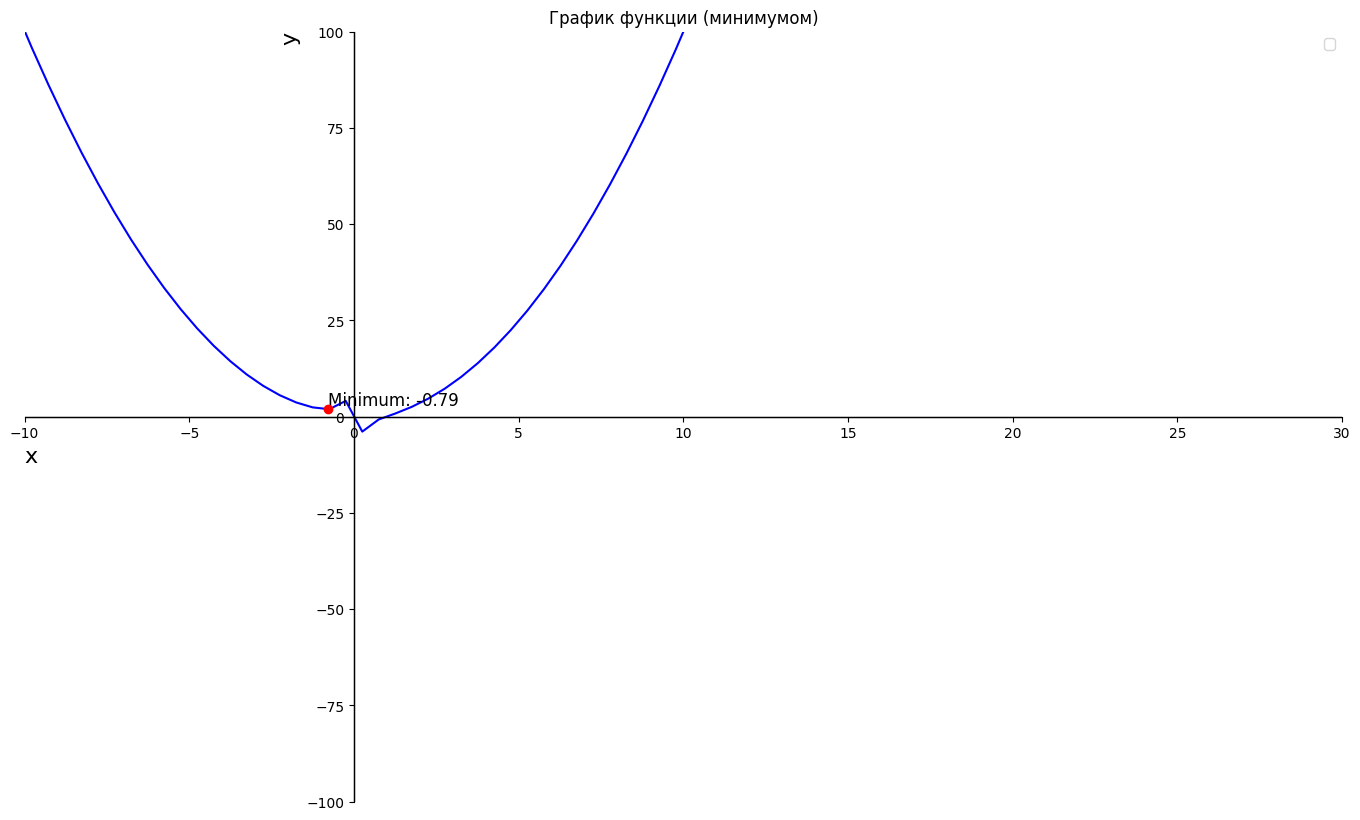

In [55]:
import sympy as sp
chx = x**2 - 1/x
def local_function_min(fx, minimum):
    x_gen = np.linspace(-100, 100, 400)
    y_gen = [fx.subs(x, val) for val in x_gen]

    plt.figure(figsize=(17, 10))
    plt.plot(x_gen, y_gen, color='blue')

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.axhline(0, lw=1, ls='-', color='black')
    plt.axvline(0, lw=1, ls='-', color='black')
    plt.scatter(minimum, fx.subs(x, minimum), color='red', zorder=10)
    plt.text(minimum, fx.subs(x, minimum), f'Minimum: {minimum:.2f}', fontsize=12, verticalalignment='bottom')
    plt.title('График функции (минимумом)')
    plt.xlabel('x', loc='left', fontsize='16')
    plt.ylabel('y', loc='top', fontsize='16')
    plt.xlim(-10, 30)
    plt.ylim(-100, 100)
    plt.legend()
    plt.show()
#Параметры градиентного спуска
learn_rate_grad = 0.1
numder_iter = 1000
delta = 0.001

start_points = np.random.uniform(-10, 10, size=5)
results = []

for x_start in start_points:
    minimum, trace = gradient_descent_method(chx, x_start, learn_rate_grad, numder_iter, delta)
    results.append(minimum)

local_min = min(results)
print(f'Приближения для f(x)): {start_points}')
print(f'Наименьший из найденных локальных минимумов для f(x): {local_min:.4f}')
local_function_min(chx, local_min)

In [67]:
import sympy as sp
import matplotlib.pyplot as plt
djx = 1/(x**5) + (x**17) + 8
def local_function_min(fx, minimum):
    x_gen = np.linspace(-100, 100, 400)
    y_gen = [fx.subs(x, val) for val in x_gen]

    plt.figure(figsize=(12, 7))
    plt.plot(x_gen, y_gen, color='blue')

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.axhline(0, lw=1, ls='-', color='black')
    plt.axvline(0, lw=1, ls='-', color='black')
    plt.scatter(minimum, fx.subs(x, minimum), color='red', zorder=10)
    plt.text(minimum, fx.subs(x, minimum), f'Минимум: {minimum:.2f}', fontsize=12, verticalalignment='bottom')
    plt.xlabel('x', loc='left', fontsize='16')
    plt.ylabel('y', loc='top', fontsize='16')
    plt.title('График функции (минимумом)')
    plt.xlim(-10, 30)
    plt.ylim(-100, 100)
    plt.legend()
    plt.show()
#Параметры градиентного спуска
learn_rate_grad = 0.1
numder_iter = 10000
delta = 0.001

start_points = np.random.uniform(0.9, 1.02, size=5)
results = []
for x_start in start_points:
    minimum, trace = gradient_descent_method(djx, x_start, learn_rate_grad, numder_iter, delta)
    results.append(minimum)
local_min = min(results)
print(f'Приближения для f(x)): {start_points}')
print(f'Наименьший из найденных локальных минимумов для f(x): {local_min:.4f}')
local_function_min(djx, local_min)

Приближения для f(x)): [1.0145528  1.00779104 0.92218477 0.9196407  0.94305609]


ValueError: Exceeds the limit (4300) for integer string conversion; use sys.set_int_max_str_digits() to increase the limit

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [68]:
# your code here
def second_method(func, x_start, num_iterations, delta):
    x = sp.symbols('x')
    сurrent_point = x_start
    first_diff = sp.diff(func, x)
    second_diff = sp.diff(first_diff, x)
    list_values = [сurrent_point]

    for i in range(num_iterations):
        gradient = first_diff.subs(x, сurrent_point)
        gradient_second = second_diff.subs(x, сurrent_point)

        if abs(gradient) < delta:
            return сurrent_point.evalf(), list_values

        if gradient_second == 0:
            raise ValueError("second_diff = нулю")

        x_init = сurrent_point - gradient / gradient_second
        list_values.append(x_init)
        сurrent_point = x_init

    return сurrent_point.evalf(), list_values


## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

Приближения для f(x): [1.0145528  1.00779104 0.92218477 0.9196407  0.94305609]
Наименьший из найденных локальных минимумов для f(x): 15.0000


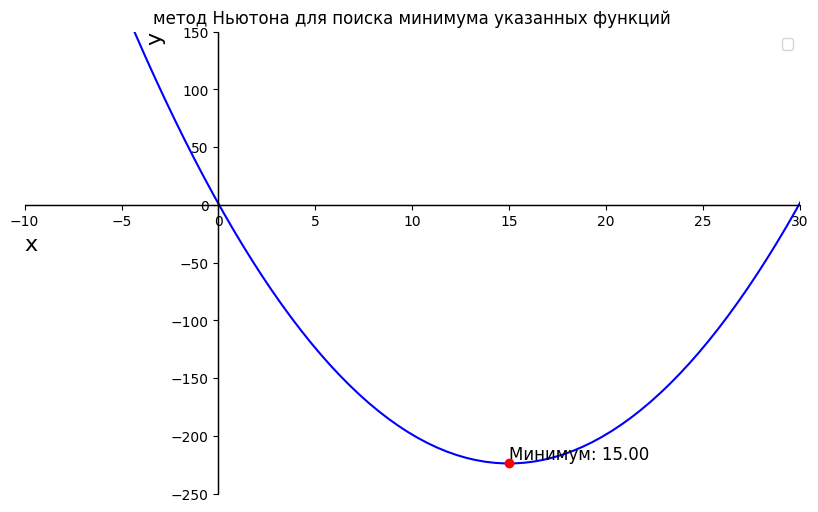

In [76]:
# your code here
def local_function_min_second_method(fx, minimum):
    x = sp.symbols('x')
    x_gen = np.linspace(-100, 100, 400)
    y_gen = [float(fx.subs(x, val)) for val in x_gen]

    plt.figure(figsize=(10, 6))
    plt.plot(x_gen, y_gen, color='blue')

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.axhline(0, lw=1, ls='-', color='black')
    plt.axvline(0, lw=1, ls='-', color='black')
    plt.scatter(minimum, fx.subs(x, minimum), color='red', zorder=5)
    plt.text(minimum, fx.subs(x, minimum), f'Минимум: {minimum:.2f}', fontsize=12, verticalalignment='bottom')
    plt.xlabel('x', loc='left', fontsize='16')
    plt.ylabel('y', loc='top', fontsize='16')
    plt.title('метод Ньютона для поиска минимума указанных функций')
    plt.xlim(-10, 30)
    plt.ylim(-250, 150)
    plt.legend()
    plt.show()

    start_points = np.random.uniform(-10, 10, size=5)
results = []

for x_start in start_points:
    minimum, list_values = second_method(afx, x_start, 1000, 0.01)
    results.append(minimum)

local_minimum = min(results)

print(f'Приближения для f(x): {start_points}')
print(f'Наименьший из найденных локальных минимумов для f(x): {local_minimum:.4f}')

local_function_min_second_method(afx, local_minimum)

Приближения для f(x): [1.0145528  1.00779104 0.92218477 0.9196407  0.94305609]
Наименьший из найденных локальных минимумов для f(x): 0.3333


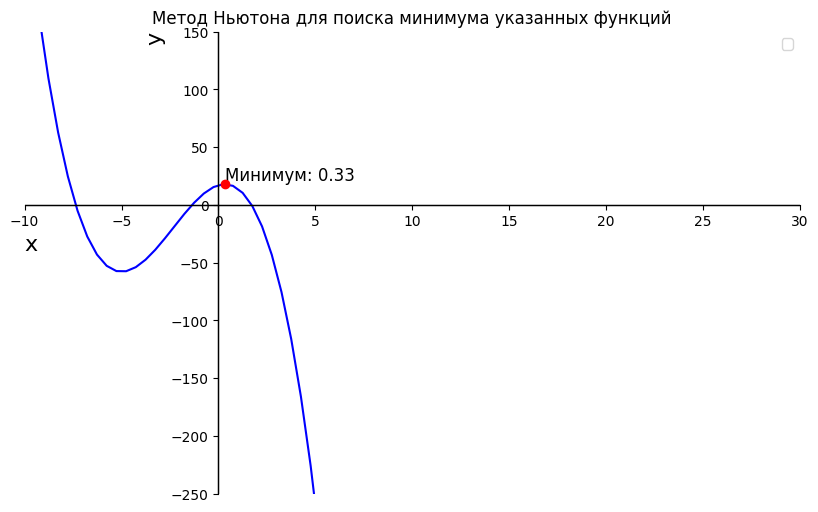

In [79]:
def local_function_min_second_method(fx, minimum):
    x = sp.symbols('x')
    x_gen = np.linspace(-100, 100, 400)
    y_gen = [float(fx.subs(x, val)) for val in x_gen]

    plt.figure(figsize=(10, 6))
    plt.plot(x_gen, y_gen, color='blue')

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.axhline(0, lw=1, ls='-', color='black')
    plt.axvline(0, lw=1, ls='-', color='black')
    plt.scatter(minimum, fx.subs(x, minimum), color='red', zorder=5)
    plt.text(minimum, fx.subs(x, minimum), f'Минимум: {minimum:.2f}', fontsize=12, verticalalignment='bottom')
    plt.xlabel('x', loc='left', fontsize='16')
    plt.ylabel('y', loc='top', fontsize='16')
    plt.title('Метод Ньютона для поиска минимума указанных функций')
    plt.xlim(-10, 30)
    plt.ylim(-250, 150)
    plt.legend()
    plt.show()

    start_points = np.random.uniform(-10, 10, size=5)
results = []

for x_start in start_points:
    minimum, list_values = second_method(bgx, x_start, 1000, 0.01)
    results.append(minimum)

local_minimum = min(results)

print(f'Приближения для f(x): {start_points}')
print(f'Наименьший из найденных локальных минимумов для f(x): {local_minimum:.4f}')

local_function_min_second_method(bgx, local_minimum)

Приближения для f(x): [1.0145528  1.00779104 0.92218477 0.9196407  0.94305609]
Наименьший из найденных локальных минимумов для f(x): -0.7937


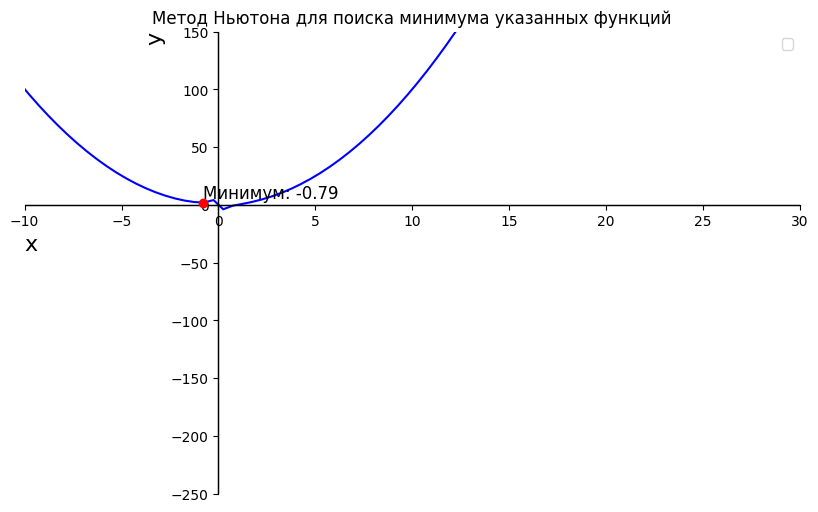

In [84]:
def local_function_min_second_method(fx, minimum):
    x = sp.symbols('x')
    x_gen = np.linspace(-100, 100, 400)
    y_gen = [float(fx.subs(x, val)) for val in x_gen]

    plt.figure(figsize=(10, 6))
    plt.plot(x_gen, y_gen, color='blue')

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.axhline(0, lw=1, ls='-', color='black')
    plt.axvline(0, lw=1, ls='-', color='black')
    plt.scatter(minimum, fx.subs(x, minimum), color='red', zorder=5)
    plt.text(minimum, fx.subs(x, minimum), f'Минимум: {minimum:.2f}', fontsize=12, verticalalignment='bottom')
    plt.title('Метод Ньютона для поиска минимума указанных функций')
    plt.xlabel('x', loc='left', fontsize='16')
    plt.ylabel('y', loc='top', fontsize='16')
    plt.xlim(-10, 30)
    plt.ylim(-250, 150)
    plt.legend()
    plt.show()

    start_points = np.random.uniform(-10, 10, size=5)
results = []

for x_start in start_points:
    minimum, list_values = second_method(chx, x_start, 1000, 0.01)
    results.append(minimum)

local_minimum = min(results)

print(f'Приближения для f(x): {start_points}')
print(f'Наименьший из найденных локальных минимумов для f(x): {local_minimum:.4f}')

local_function_min_second_method(chx, local_minimum)

Приближения для f(x): [1.0145528  1.00779104 0.92218477 0.9196407  0.94305609]
Наименьший из найденных локальных минимумов для f(x): 0.9459


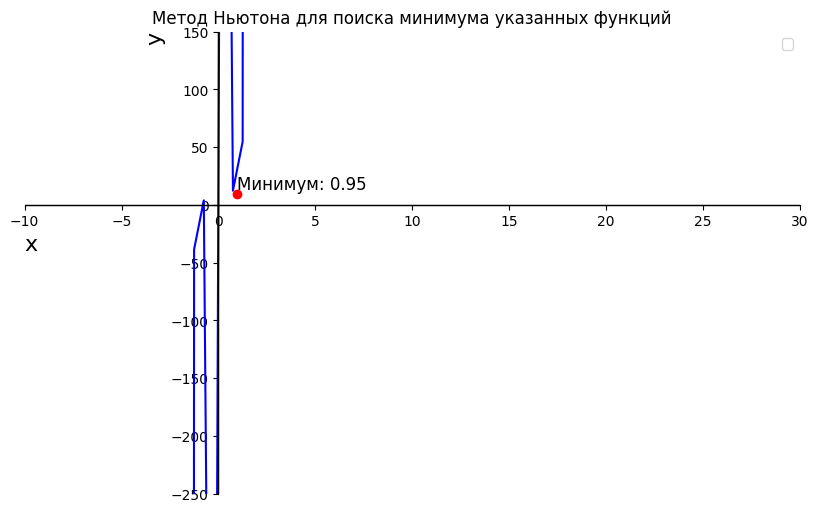

In [83]:
def local_function_min_second_method(fx, minimum):
    x = sp.symbols('x')
    x_gen = np.linspace(-100, 100, 400)
    y_gen = [float(fx.subs(x, val)) for val in x_gen]

    plt.figure(figsize=(10, 6))
    plt.plot(x_gen, y_gen, color='blue')

    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    plt.axhline(0, lw=1, ls='-', color='black')
    plt.axvline(0, lw=1, ls='-', color='black')
    plt.scatter(minimum, fx.subs(x, minimum), color='red', zorder=5)
    plt.text(minimum, fx.subs(x, minimum), f'Минимум: {minimum:.2f}', fontsize=12, verticalalignment='bottom')
    plt.xlabel('x', loc='left', fontsize='16')
    plt.ylabel('y', loc='top', fontsize='16')
    plt.title('Метод Ньютона для поиска минимума указанных функций')
    plt.xlim(-10, 30)
    plt.ylim(-250, 150)
    plt.legend()
    plt.show()

    start_points = np.random.uniform(-10, 10, size=5)
results = []

for x_start in start_points:
    minimum, list_values = second_method(djx, x_start, 1000, 0.01)
    results.append(minimum)

local_minimum = min(results)

print(f'Приближения для f(x): {start_points}')
print(f'Наименьший из найденных локальных минимумов для f(x): {local_minimum:.4f}')

local_function_min_second_method(djx, local_minimum)

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [ ]:
# your code here


## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [85]:
# your code here
def gradient_momentum(func, x_start, learning_rate, momentum, num_iterations, delta):
    first_diff = sp.diff(func, x)
    сurrent_point = x_start
    vector = 0

    for i in range(num_iterations):
        gradient = first_diff.subs(x, сurrent_point)

        if abs(gradient) < delta:
            return сurrent_point.evalf(), list_values

        vector = momentum * vector - learning_rate * gradient
        x_init = сurrent_point + vector
        сurrent_point = x_init
    return сurrent_point.evalf()

In [86]:
gradient_momentum(afx, 10, 0.1, 0.9, 1000, 10**(-5))

(14.9999976207120,
 [0.9430560870071764,
  8.77051755368913,
  -0.0195292259272630,
  -0.0292936207042603,
  -0.0439393265390000,
  -0.0659033990851379,
  -0.0988268108894360,
  -0.148097270534800,
  -0.221426670339151,
  -0.328572854708070,
  -0.475975128146657,
  -0.644467638809943,
  -0.762579965637144,
  -0.792449084474499])

In [87]:
gradient_momentum(bgx, 10, 0.1, 0.9, 1000, 10**(-5))

3.64936498781165e+6671317420598795922416523462176964087965501354180464751533287978879673380311133553774577429720700703548800808203037813904969973085321864217992076284851876783302586278048778118555867780131823699700529329495614116281146453504127841167232101655512972070686764179740505856275175622409214887381119960385852

In [88]:
gradient_momentum(chx, 10, 0.1, 0.9, 1000, 10**(-5))

(-0.793700435224876,
 [0.9430560870071764,
  8.77051755368913,
  -0.0195292259272630,
  -0.0292936207042603,
  -0.0439393265390000,
  -0.0659033990851379,
  -0.0988268108894360,
  -0.148097270534800,
  -0.221426670339151,
  -0.328572854708070,
  -0.475975128146657,
  -0.644467638809943,
  -0.762579965637144,
  -0.792449084474499])

In [89]:
gradient_momentum(djx, 10, 0.1, 0.9, 1000, 10**(-5))

-1.35195204555544e+133845600753011549711602406767987496223904546820796369858255692845015436051887649213229712673791321925306368853485130857218796338930963966287142821142403563728172880153085804820040224799048031157302196048541875481617708422632221174672652691672721667967714528609547960152269865238289321756875235448274289841792578733887286000862756027316087934984385475060627696630928365564350468622768527717526486633890402450723479247326842065967620442020298892531259886524225374406970643621637283407213658375652871376850697055523610991537303585380125310736999705010612825453629621767240775902538805137154177223030508806434965031558086067935951639667341255161202596742492854510646724432824272224185505764385041665185524419225720599678476292775589140256906423468842233357708793958420079454074572820090863179805525545582914287206136080462751235445020880846838114712992063642614260452694070530899469196478727857865761231999528897415911052362702942197340938105399102394216543682906531869926239735773367

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [100]:
# your code here
search_initial_approximation = [-10, 0, 20]
for i in search_initial_approximation:
    f_x = gradient_momentum(afx, i, learning_rate=0.1, momentum=0.9, num_iterations=100, delta=1e-6)
    print(f"Начальное приближение {i}: Найденный минимум: {f_x}")

Начальное приближение -10: Найденный минимум: 15.0712852780296
Начальное приближение 0: Найденный минимум: 15.0427711668177
Начальное приближение 20: Найденный минимум: 14.9857429443941


In [99]:
search_initial_approximation = [-8, -7, -6]
for i in search_initial_approximation:
    f_x = gradient_momentum(bgx, i, 0.1, 0.2, 100, 10**(-5))
    print(f"Начальное приближение {i}: Найденный минимум: {f_x}")

Начальное приближение -8: Найденный минимум: (-4.99999985051706, [0.9430560870071764, 8.77051755368913, -0.0195292259272630, -0.0292936207042603, -0.0439393265390000, -0.0659033990851379, -0.0988268108894360, -0.148097270534800, -0.221426670339151, -0.328572854708070, -0.475975128146657, -0.644467638809943, -0.762579965637144, -0.792449084474499])
Начальное приближение -7: Найденный минимум: (-4.99999940211954, [0.9430560870071764, 8.77051755368913, -0.0195292259272630, -0.0292936207042603, -0.0439393265390000, -0.0659033990851379, -0.0988268108894360, -0.148097270534800, -0.221426670339151, -0.328572854708070, -0.475975128146657, -0.644467638809943, -0.762579965637144, -0.792449084474499])
Начальное приближение -6: Найденный минимум: (-5.00000001560737, [0.9430560870071764, 8.77051755368913, -0.0195292259272630, -0.0292936207042603, -0.0439393265390000, -0.0659033990851379, -0.0988268108894360, -0.148097270534800, -0.221426670339151, -0.328572854708070, -0.475975128146657, -0.64446763

In [101]:
search_initial_approximation = [-0.3, -0.2, -0.01]
for i in search_initial_approximation:
    f_x = gradient_momentum(chx, i, 0.1, 0.2, 100, 10**(-5))
    print(f"Начальное приближение {i}: Найденный минимум: {f_x}")

Начальное приближение -0.3: Найденный минимум: (-0.793700921146179, [0.9430560870071764, 8.77051755368913, -0.0195292259272630, -0.0292936207042603, -0.0439393265390000, -0.0659033990851379, -0.0988268108894360, -0.148097270534800, -0.221426670339151, -0.328572854708070, -0.475975128146657, -0.644467638809943, -0.762579965637144, -0.792449084474499])
Начальное приближение -0.2: Найденный минимум: (-0.793701229896915, [0.9430560870071764, 8.77051755368913, -0.0195292259272630, -0.0292936207042603, -0.0439393265390000, -0.0659033990851379, -0.0988268108894360, -0.148097270534800, -0.221426670339151, -0.328572854708070, -0.475975128146657, -0.644467638809943, -0.762579965637144, -0.792449084474499])
Начальное приближение -0.01: Найденный минимум: (-0.793699584862483, [0.9430560870071764, 8.77051755368913, -0.0195292259272630, -0.0292936207042603, -0.0439393265390000, -0.0659033990851379, -0.0988268108894360, -0.148097270534800, -0.221426670339151, -0.328572854708070, -0.475975128146657, -

In [105]:
search_initial_approximation = [0.75, 0.95, 1]
for i in search_initial_approximation:
    f_x = gradient_momentum(djx, i, 0.1, 0.001, 100, 10**(-5))
    print(f"Начальное приближение {i}: Найденный минимум: {f_x}")

InvalidOperation: [<class 'decimal.InvalidOperation'>]

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

# ** Сабрины Садиех**